<a href="https://colab.research.google.com/github/jess22jess/EDPII/blob/main/TAREA_M%C3%A9t_Colocaci%C3%B3n.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# MÉTODO DE COLOCACIÓN PARA EDO
**EDP II**

**Jessica Beatriz Arcos Gutiérrez**

---

**Descripción:**

Resuelve la ecuación:
$${\frac{d^2 u}{dx^2} + u = x }$$

con condiciones:
- **Condición inicial:** $u(0) = 0, u´ (0) = 2$
- **Dominio:** $0 \leq x \leq 1$



In [52]:
import sympy as sp
import numpy as np
import matplotlib.pyplot as plt

In [53]:
x = sp.symbols('x') #introduciomos una variable
u = sp.Function('u') #Esto es una función

Para resolver la ecuación

In [54]:
ode = u(x).diff(x, x) + u(x) - x  # u'' + u - x = 0
sp.dsolve(ode, u(x))

Eq(u(x), C1*sin(x) + C2*cos(x) + x)

In [55]:
sol = sp.dsolve(ode, ics={u(0): 0, u(x).diff(x).subs(x, 0): 2}) # diccionario

In [56]:
sol

Eq(u(x), x + sin(x))

In [57]:
#Comvertimos en un arreglo de numpy
u_expr = sol.rhs
u_num  = sp.lambdify(x, u_expr,"numpy")

In [58]:
xx = np.linspace(0, 1, 100) #np.linspace() Crea un array de números equiespaciados en un intervalo:
yy = u_num(xx)

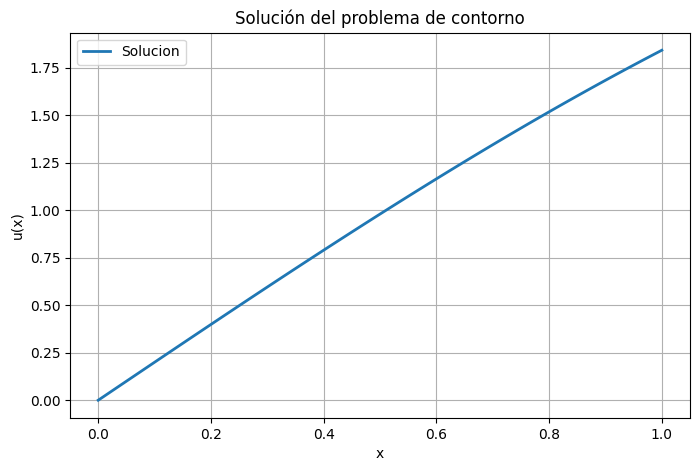

In [59]:
plt.figure(figsize=(8, 5)) #Crea una nueva figura para el gráfico
                            # figsize: (ancho, alto)
plt.plot(xx, yy, label="Solucion", linewidth=2) #Dibuja la solución como una línea
plt.title('Solución del problema de contorno') #Añade un título al gráfico
plt.xlabel('x') #Etiquetan los ejes
plt.ylabel('u(x)') #Etiquetan los ejes
plt.grid() #Añade una cuadrícula al gráfico
plt.legend() #Añade una leyenda al gráfico
plt.show() #Muestra el gráfico en pantalla

In [60]:
a2, a3 = sp.symbols('a2 a3')
# Función de prueba cúbica que satisface condiciones iniciales
u_n = 2*x + a2*x**2 + a3*x**3

In [61]:
u_n

a2*x**2 + a3*x**3 + 2*x

In [62]:
u_n_2 = sp.diff(u_n, x, 2)

F = u_n_2 + u_n

In [63]:
F

a2*x**2 + a3*x**3 + 2*x + 2*(a2 + 3*a3*x)

In [64]:
#Puntos de colocacion

points =[sp.Rational(1,2), sp.Rational(1,1)]

In [65]:
points

[1/2, 1]

In [66]:
eqs = [sp.Eq(F.subs(x,p),0) for p in points]

#Resolver para a2 y a3
sol = sp.solve(eqs, [a2,a3])

In [67]:
for eq in eqs:
    print(eq)

Eq(9*a2/4 + 25*a3/8 + 1, 0)
Eq(3*a2 + 7*a3 + 2, 0)


In [68]:
print ("Sistema de ecuciones simbolico: ")
for eq in eqs:
    sp.pprint(eq)

Sistema de ecuciones simbolico: 
9⋅a₂   25⋅a₃        
──── + ───── + 1 = 0
 4       8          
3⋅a₂ + 7⋅a₃ + 2 = 0


In [69]:
sol

{a2: -2/17, a3: -4/17}

In [70]:
#Sustutuir en la funcion de prueba
u_approx = u_n.subs(sol)

In [71]:
u_approx

-4*x**3/17 - 2*x**2/17 + 2*x

In [72]:
u_approx_fn = sp.lambdify(x, u_approx, "numpy")

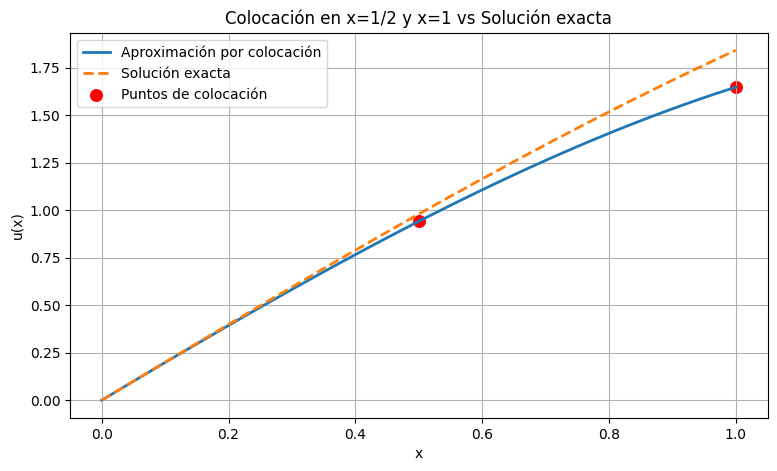

In [73]:
#Solución analítica y númerica
xx = np.linspace(0,1,100)
plt.figure(figsize=(9,5))
plt.plot(xx, u_approx_fn(xx), label="Aproximación por colocación", linewidth=2)
plt.plot(xx, yy, "--", label="Solución exacta", linewidth=2)

#puntos de colocación
plt.scatter([0.5,1.0], u_approx_fn(np.array([0.5,1.0])),
           color="red", s=70, label="Puntos de colocación")

plt.title("Colocación en x=1/2 y x=1 vs Solución exacta")
plt.xlabel("x")
plt.ylabel("u(x)")
plt.grid(True)
plt.legend()
plt.show()